In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('hotelx2.xlsx')

In [3]:
df

,Bulan,Occ (%)
0,2018-04-01,0.339418
1,2018-05-01,0.415873
2,2018-06-01,0.202910
3,2018-07-01,0.764977
4,2018-08-01,0.423451
...,...,...
58,2023-02-01,0.810691
59,2023-03-01,0.740460
60,2023-04-01,0.692375
61,2023-05-01,0.879823


In [4]:
df.set_index(['Bulan'], inplace=True) 

<Axes: xlabel='Bulan'>

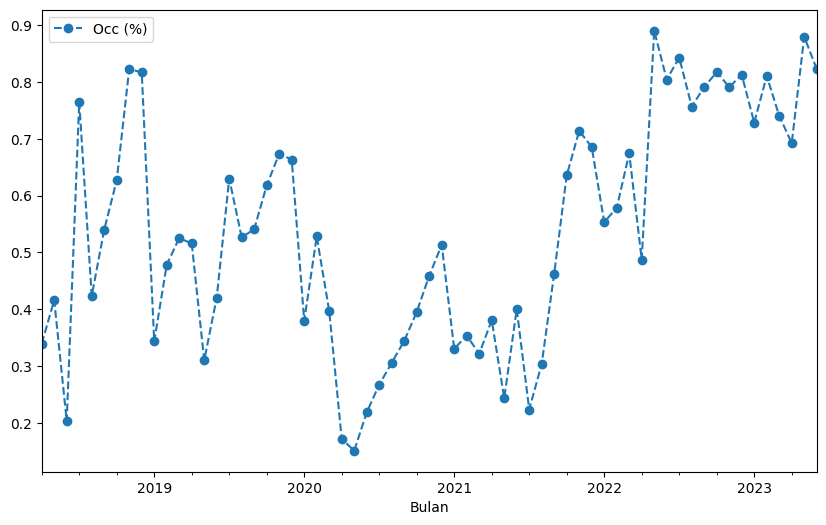

In [5]:
df.plot(marker='o', linestyle='--', figsize=(10,6))

In [6]:
train_size = int(0.8 * len(df.index)) # 80% for training data
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [7]:
X_train = train_df
y_train = train_df['Occ (%)']

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

In [9]:
regressor = Sequential()

n_cols = X_train.shape[1] #get number of columns in training data

#adding the input layer and the first hidden layer and droup out regulation
regressor.add(Dense(units=500, kernel_initializer='uniform', activation='relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))

c:\Users\vaiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#adding the output layer
regressor.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [11]:
#compiling the NN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
regressor.fit(X_train, y_train, 
              validation_split=0.3, 
              epochs =150)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - loss: 0.0309 - val_loss: 0.0351
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0318 - val_loss: 0.0349
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0315 - val_loss: 0.0347
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0296 - val_loss: 0.0346
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0302 - val_loss: 0.0346
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0307 - val_loss: 0.0346
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0302 - val_loss: 0.0346
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0309 - val_loss: 0.0345
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0288 - val_loss: 0.0345
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.0285 - val_loss: 0.0343
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0303 - val_loss: 0.0342
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0289

In [13]:
#save trained model
regressor.save('model.h5')

In [14]:
#normalization
nor = (test_df-test_df.min())/(test_df.max()-test_df.min())

In [15]:
#create a dataframe with all training data except the target columns
X_test = nor
#create a datataframe with only the target columns
y_test = nor['Occ (%)']

In [16]:
#Load trained model
regressor = load_model('model.h5')

#Predict and test the model
input_data = X_test.values
real_occupancy = y_test.values

predicted_occupancy = regressor.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


In [17]:
target = real_occupancy[~np.isnan(real_occupancy)]
predict = predicted_occupancy[~np.isnan(real_occupancy)]

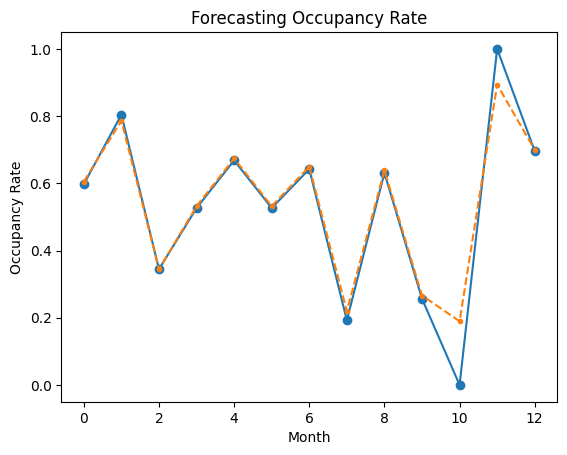

Mean Square Error:  0.001869508189011548


In [18]:
plt.plot(target, marker='o')
plt.plot(predict, '--', marker='.')
plt.title('Forecasting Occupancy Rate')
plt.xlabel('Month')
plt.ylabel('Occupancy Rate')
plt.show()

def mse(predictions, targets):
    return 0.5 * (((predictions - targets) ** 2).mean())

#mse = ((real_close_price - predicted_close_price) ** 2).mean(axis=1)
print('Mean Square Error: ',mse(predict.flatten(),target.flatten()))

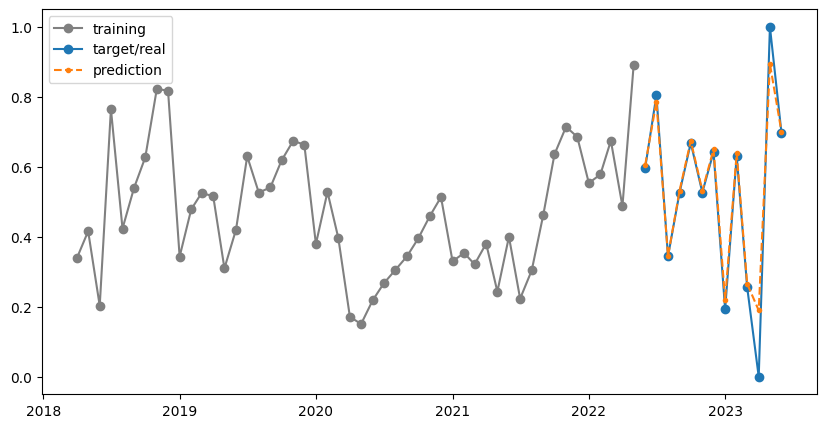

In [19]:
plt.figure(figsize=(10,5))
plt.plot(train_df.index, X_train, color='gray', label='training', marker='o')
plt.plot(test_df.index, X_test, label='target/real', marker='o')
plt.plot(test_df.index, predicted_occupancy, '--', label='prediction', marker='.')
plt.legend()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

print('Test RMSE :', mean_squared_error(X_test, predict)**0.5)
print('Test MAPE :', mean_absolute_percentage_error(predict, target))

Test RMSE : 0.06114749869150728
Test MAPE : 0.10541223007714104


In [21]:
last_month_data = df.tail(1)
future_predictions = []

In [22]:
model = load_model('model.h5')

In [23]:
for i in range(6):
    prediction = model.predict(last_month_data)
    future_predictions.append(prediction[0][0])
    next_month = pd.DataFrame({
        'Occ (%)': [prediction[0][0]]
    }, index=[last_month_data.index[-1] + pd.DateOffset(months=1)])
    df = pd.concat([df, next_month])
    last_month_data = next_month

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [24]:
future_predictions

[np.float32(0.7993045),
 np.float32(0.7828227),
 np.float32(0.7707296),
 np.float32(0.7615603),
 np.float32(0.754442),
 np.float32(0.74881804)]

In [25]:
df.tail(20)

,Occ (%)
2022-05-01,0.890365
2022-06-01,0.804357
2022-07-01,0.843137
2022-08-01,0.756905
2022-09-01,0.791068
2022-10-01,0.817626
2022-11-01,0.791068
2022-12-01,0.812777
2023-01-01,0.728442
2023-02-01,0.810691


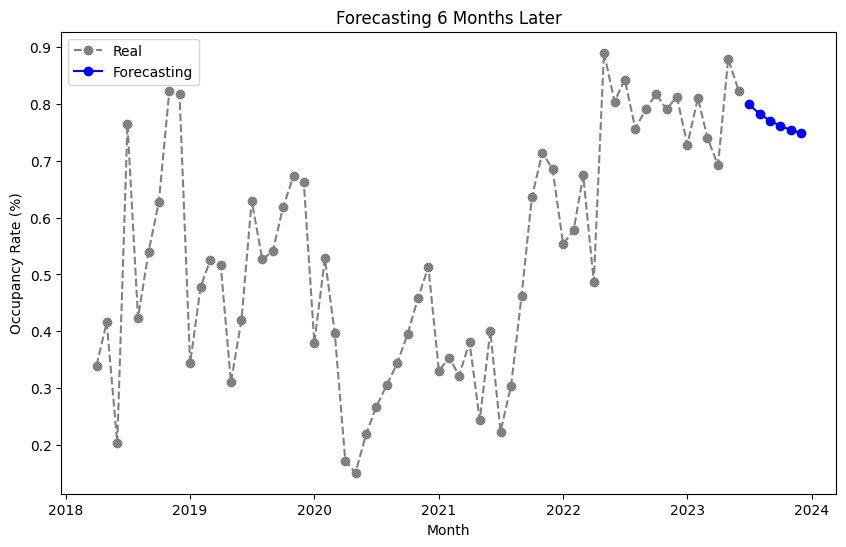

In [26]:
plt.figure(figsize=(10, 6))

# Plot data asli (warna abu-abu)
plt.plot(df.index[:len(df)-6], df['Occ (%)'][:len(df)-6], marker='o', linestyle='--', color='gray', label='Real')

# Plot hasil prediksi 6 bulan ke depan (warna biru)
plt.plot(df.index[len(df)-6:], future_predictions, marker='o', linestyle='-', color='blue', label='Forecasting')

# Menambahkan label dan judul
plt.title('Forecasting 6 Months Later')
plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.legend()

# Tampilkan grafik
plt.show()

In [27]:
import pickle

In [28]:
pickle.dump(regressor, open('forecasting_occ.sav','wb'))

In [29]:
import pickle

with open('forecasting_occ.sav', 'rb') as file:
    model = pickle.load(file)
print(type(model))

<class 'keras.src.models.sequential.Sequential'>


c:\Users\vaiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
